In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split                   
from sklearn.metrics import classification_report     
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [185]:
df = pd.read_csv('C:/Users/Andrea/test/clothes_price_prediction_dat.csv', sep=',',  header=1)
print(df.head())

          Brand Category  Color Size Material Price;;;
0   New Balance    Dress  White   XS    Nylon   182;;;
1   New Balance    Jeans  Black   XS     Silk    57;;;
2  Under Armour    Dress    Red    M     Wool   127;;;
3          Nike    Shoes  Green    M   Cotton    77;;;
4        Adidas  Sweater  White    M    Nylon   113;;;


In [186]:
df.describe()

,Brand,Category,Color,Size,Material,Price;;;
count,1000,1000,1000,1000,1000,1000
unique,6,6,6,6,6,190
top,Under Armour,Jacket,Yellow,XS,Polyester,97;;;
freq,179,191,173,196,175,12


In [187]:
df = df.replace(';', '', regex=True)

In [188]:
df = df.rename(columns={'Price;;;': 'Price'})
df = df.rename(columns={'97;;;': '97'})

In [189]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
print(df.head())

          Brand Category  Color Size Material Price
0   New Balance    Dress  White   XS    Nylon   182
1   New Balance    Jeans  Black   XS     Silk    57
2  Under Armour    Dress    Red    M     Wool   127
3          Nike    Shoes  Green    M   Cotton    77
4        Adidas  Sweater  White    M    Nylon   113


In [190]:
df.describe()

,Brand,Category,Color,Size,Material,Price
count,1000,1000,1000,1000,1000,1000
unique,6,6,6,6,6,190
top,Under Armour,Jacket,Yellow,XS,Polyester,97
freq,179,191,173,196,175,12


In [191]:
df.Price.describe()

count     1000
unique     190
top         97
freq        12
Name: Price, dtype: object

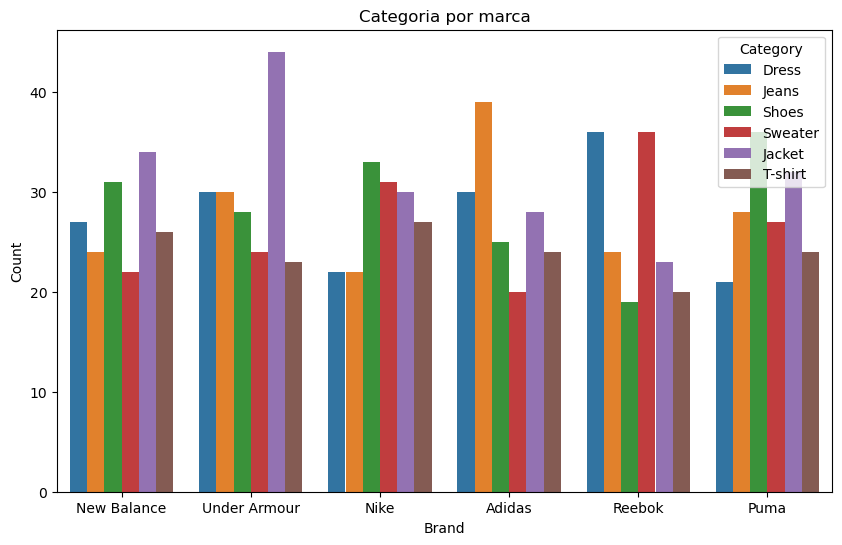

In [192]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Brand', hue='Category')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Categoria por marca')
plt.show()

In [193]:
#Modelo Predicción
x = df.drop(['Price'], axis = 1)
y = df.Price

print(x.shape)
print(y.shape)


(1000, 5)
(1000,)


In [194]:

# Si hay variables categóricas, conviértelas a numéricas (por ejemplo, con get_dummies)
X = pd.get_dummies(x, drop_first=True)

In [195]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [196]:
# Crear el modelo XGBoost para regresión
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)

In [197]:

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],          # Conjunto de validación para early stopping
    #early_stopping_rounds=10,           # Detiene si no mejora en 10 rondas
    verbose=True
)

[0]	validation_0-rmse:55.15988
[1]	validation_0-rmse:55.62326
[2]	validation_0-rmse:56.03978
[3]	validation_0-rmse:56.50469
[4]	validation_0-rmse:56.99273
[5]	validation_0-rmse:57.49590
[6]	validation_0-rmse:57.83846
[7]	validation_0-rmse:58.11068
[8]	validation_0-rmse:58.38434
[9]	validation_0-rmse:58.64528
[10]	validation_0-rmse:59.07203
[11]	validation_0-rmse:59.39468
[12]	validation_0-rmse:59.70611
[13]	validation_0-rmse:60.13174
[14]	validation_0-rmse:60.41752
[15]	validation_0-rmse:60.72414
[16]	validation_0-rmse:61.10024
[17]	validation_0-rmse:61.25119
[18]	validation_0-rmse:61.40574
[19]	validation_0-rmse:61.63885
[20]	validation_0-rmse:61.84050
[21]	validation_0-rmse:62.08235
[22]	validation_0-rmse:62.10997
[23]	validation_0-rmse:62.21994
[24]	validation_0-rmse:62.36062
[25]	validation_0-rmse:62.63693
[26]	validation_0-rmse:62.83408
[27]	validation_0-rmse:63.05819
[28]	validation_0-rmse:63.22884
[29]	validation_0-rmse:63.41079
[30]	validation_0-rmse:63.60299
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [198]:
# Validar el modelo con el conjunto de validación
y_val_pred = model.predict(X_val)
print(f"RMSE en validación: {mean_squared_error(y_val, y_val_pred, squared=False):.4f}")
print(f"R2 en validación: {r2_score(y_val, y_val_pred):.4f}")

# Probar el modelo con el conjunto de prueba
y_test_pred = model.predict(X_test)
print(f"RMSE en prueba: {mean_squared_error(y_test, y_test_pred, squared=False):.4f}")
print(f"R2 en prueba: {r2_score(y_test, y_test_pred):.4f}")

RMSE en validación: 70.0664
R2 en validación: -0.6432
RMSE en prueba: 59.6955
R2 en prueba: -0.2160


C:\Users\Andrea\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Andrea\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [201]:
#Encoding Categorical Variables
encoder = OrdinalEncoder()
df[['Brand','Category','Color','Size','Material']] = encoder.fit_transform(df[['Brand','Category','Color','Size','Material']])

In [202]:
df.head()

,Brand,Category,Color,Size,Material,Price
0,1.0,0.0,4.0,4.0,2.0,182
1,1.0,2.0,0.0,4.0,4.0,57
2,5.0,0.0,3.0,1.0,5.0,127
3,2.0,3.0,2.0,1.0,0.0,77
4,0.0,4.0,4.0,1.0,2.0,113


In [203]:
x = df.drop(['Price'], axis = 1)
y = df.Price

print(x.shape)
print(y.shape)

(1000, 5)
(1000,)


In [204]:
#entrenamiento y pruebas
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15)

In [205]:
#regresión logistica
Log_Reg=LogisticRegression()
Log_Reg.fit(x_train,y_train)

C:\Users\Andrea\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [206]:
def model_evaluation(actual, predicted):
  ac_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  print('Model Accuracy is: ', round(ac_score, 2))
  

In [207]:
Log_Reg_train = Log_Reg.predict(x_train)
Log_Reg_test = Log_Reg.predict(x_test)

In [208]:
print('Prueba Accuracy RL')
model_evaluation(y_train,Log_Reg_train)

Prueba Accuracy RL
Model Accuracy is:  0.06


In [209]:
print('Test Accuracy RL')
model_evaluation(y_test,Log_Reg_test)

Test Accuracy RL
                                        
Model Accuracy is:  0.0
